In [3]:


# import os
# import torch
# import torch.nn as nn
# import torchvision.models as models


# from torch.utils.data import DataLoader
# from dataloader_e2e import create_dataset_12
# import matplotlib.pyplot as plt
# from PIL import ImageOps
# import torchvision
# import numpy as np
# import cv2

# import torch
# import torchvision
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt
# import numpy as np
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim

# #from class_pretrain import model

# # 自作の特徴抽出機の定義
# class CustomFeatureExtractor(nn.Module):
#     def __init__(self):
#         super(CustomFeatureExtractor, self).__init__()
#         # ここに自分の特徴抽出機の構造を定義
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
#         self.relu = nn.ReLU(inplace=True)
#         self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.relu(x)
#         x = self.conv2(x)
#         x = self.relu(x)
#         x = self.pool(x)
#         return x

# class CNNModel(nn.Module):
#     def __init__(self):
#         super(CNNModel, self).__init__()
#         # 畳み込み層や全結合層などを定義する
#         self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
#         self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
#         self.conv3 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.gap = nn.AdaptiveAvgPool2d(1)
#         self.faltten = nn.Flatten()
#         self.fc1 = nn.Linear(16,16)
#         self.fc2 = nn.Linear(16, 12)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = self.gap(x)
#         x = self.faltten(x)
#         #x = x.view(-1, 16 * 56 * 112)  
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# # 事前学習済みのResNet18モデルから特徴抽出機を作成
# pretrained_resnet = models.resnet18(pretrained=True)
# pretrained_feature_extractor = nn.Sequential(*list(pretrained_resnet.children())[:-2])



# # 自作の特徴抽出機とResNet18の特徴抽出機を結合
# custom_feature_extractor = CustomFeatureExtractor()
# combined_feature_extractor = nn.Sequential(custom_feature_extractor, pretrained_feature_extractor)

# # 新しい分類タスクに適したモデルを構築
# num_classes = 10  # 例: 10クラスの分類タスク
# new_model = nn.Sequential(
#     combined_feature_extractor,
#     nn.AdaptiveAvgPool2d((1, 1)),
#     nn.Flatten(),
#     nn.Linear(512, num_classes)  # 例: ResNet18の最後の全結合層の出力次元数は512
# )

# # 転移学習用に特徴抽出機のパラメータを凍結
# for param in custom_feature_extractor.parameters():
#     param.requires_grad = False

# # データローダや最適化アルゴリズムなどを設定
# # ...

# # モデルを訓練
# # ...

# # モデルを保存
# torch.save(new_model.state_dict(), 'transferred_model.pth')


/python/build/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/python/build/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cuda
Classification lab : {'Lateral': 0, 'Posterior': 1, 'Anterior': 2, 'Inferior': 3, 'Normal': 4}
Number of datas 378
torch.Size([12, 378, 3, 112, 224])
378
378
CNNModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (gap): AdaptiveAvgPool2d(output_size=1)
  (faltten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
)
best score!!
Epoch [1/1] Train-Loss: 2.496367883682251 Test-Loss: 0.7488358020782471 Train-f1: 0.012820512820512822 Test-f1: 0.012820512820512822


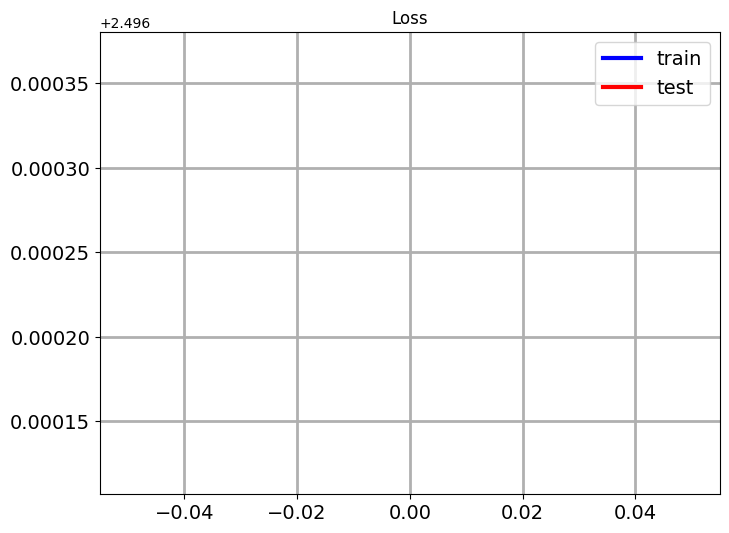

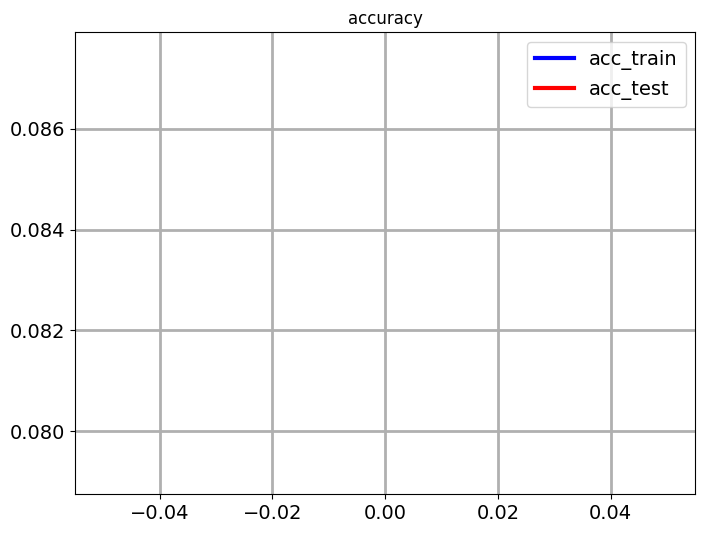

<Figure size 1600x1600 with 0 Axes>

In [2]:
import os

from torch.utils.data import DataLoader
from dataloader_e2e import create_dataset_12
import matplotlib.pyplot as plt
from PIL import ImageOps
import torchvision
import numpy as np
import cv2

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from class_pretrain import model

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model.state_dict()

cuda


OrderedDict([('conv1.weight',
              tensor([[[[-1.1380e-01,  4.3884e-02,  1.3195e-01],
                        [ 3.7893e-03,  5.8253e-02, -1.1583e-01],
                        [-1.2414e-01, -4.1684e-02,  8.0881e-02]],
              
                       [[-4.4305e-02,  1.2123e-01,  1.4900e-01],
                        [-1.7954e-01, -1.1631e-01, -1.2227e-01],
                        [ 9.3939e-02,  1.3738e-01,  1.1986e-01]],
              
                       [[ 1.8666e-01, -5.3078e-02,  8.1713e-02],
                        [ 1.4960e-01, -8.3566e-02,  1.0365e-01],
                        [ 5.1084e-02, -1.8981e-01, -1.5540e-01]]],
              
              
                      [[[ 7.2673e-02,  3.8031e-02,  9.2552e-02],
                        [-2.4490e-02, -6.3831e-02, -1.0236e-01],
                        [-1.8963e-01,  1.8538e-01,  2.5075e-02]],
              
                       [[-1.9039e-01,  1.6250e-01, -1.8406e-01],
                        [-1.6170e-01, -3.2907

In [3]:
path = os.getcwd()
path = '/root/notebooks/sample/dataset/ECG100_224/'

In [4]:
train_dataloader,test_dataloader,label_lead=create_dataset_12(path,32,None)

Classification lab : {'Lateral': 0, 'Posterior': 1, 'Anterior': 2, 'Inferior': 3, 'Normal': 4}
Number of datas 378
torch.Size([12, 378, 3, 112, 224])
378
378


In [10]:
import torch.nn as nn
import torch.nn.functional as F

model.load_state_dict(torch.load('/root/notebooks/sample/models/bestmodel.pth'))

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # 畳み込み層や全結合層などを定義する
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.faltten = nn.Flatten()
        self.fc1 = nn.Linear(16,16)
        self.fc2 = nn.Linear(16, 12)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.gap(x)
        x = self.faltten(x)
        #x = x.view(-1, 16 * 56 * 112)  
        x = F.relu(self.fc1(x))
        return x


model.state_dict()

# モデルのインスタンスを作成
model = CNNModel().to(device)

In [6]:
# 損失関数
criterion = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(model.parameters(), lr=0.0001)
bestscore = 1000.0
loss_list,loss_list_test = [], []
f1s, f1s_test = [],[]
acc, acc_test = [], []

In [7]:
print(model)

CNNModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (gap): AdaptiveAvgPool2d(output_size=1)
  (faltten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
)


In [8]:
pred,label = [],[]
model.load_state_dict(torch.load('/root/notebooks/sample/models/bestmodel.pth'))
model.eval()

#モデル評価
for ecg_image,labels,label_lead,patients,num_leads in test_dataloader:
    image =ecg_image.reshape(-1,3,112,224).to(device)
    label_lead = label_lead.reshape(-1).to(device)
    label.extend(label_lead.tolist())
    outputs = model(image)  # モデルの出力を計算
    prob, preds=torch.max(outputs,1)
    pred.extend(preds.tolist())
    f1_test = f1_score(preds.tolist(),label_lead.tolist(),average='macro')
    #print(outputs)
    loss = criterion(outputs, label_lead)  # 損失を計算

    running_loss_test += loss.item()

NameError: name 'f1_score' is not defined